In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
datos = pd.read_csv( 'newdata.csv' )

In [3]:
datos.head()

,Moment,number,web,Name of Provider,Number of Comments,Expected Delivery Time,Minimum Charge Ordering,Cost Delivery,Latitude,Longitude,Typical Traffic Afternoon,Typical Traffic Noon,Typical Traffic Morning,DailyTraffic,ClientLatitude,ClientLongitude,Distance(mts),Time(sec),Time(min)
0,Morning,1,https://domicilios.com/bogota/kfc-cc-atlantis-...,KFC,5329,45.0,9900.0,3500.0,4.66597,-74.05558,Red,Orange,Green,ROG,4.665798,-74.040855,2500,660,11
1,Morning,1,https://domicilios.com/bogota/kfc-cc-atlantis-...,KFC,5329,45.0,9900.0,3500.0,4.66597,-74.05558,Red,Orange,Green,ROG,4.666159,-74.038331,3300,720,12
2,Morning,1,https://domicilios.com/bogota/kfc-cc-atlantis-...,KFC,5329,45.0,9900.0,3500.0,4.66597,-74.05558,Red,Orange,Green,ROG,4.670228,-74.026783,9100,1740,29
3,Morning,1,https://domicilios.com/bogota/kfc-cc-atlantis-...,KFC,5329,45.0,9900.0,3500.0,4.66597,-74.05558,Red,Orange,Green,ROG,4.662140,-74.008008,9700,1740,29
4,Morning,1,https://domicilios.com/bogota/kfc-cc-atlantis-...,KFC,5329,45.0,9900.0,3500.0,4.66597,-74.05558,Red,Orange,Green,ROG,4.669905,-74.104917,8800,1320,22


In [4]:
datos.iloc[0:2,4:6]

,Number of Comments,Expected Delivery Time
0,5329,45.0
1,5329,45.0


El resultado de la sintaxis anterior nos muestra un pedacito pequeño de toda la base de datos. Específicamente, nos muestra las primeras dos filas y la columna 4 y 5 de la base de datos. 

Supongamos que queremos obtener un gráfico de torta para entender la distribución de observaciones hechas en las mañanas, al medio día y durante la tarde. Para ello, toca "crear" una nueva base de datos (la llamaremos "data1") dentro de la cual se agrupe el conteo de cada observación según la variable moment.

In [5]:
data1 = datos.groupby("Moment")["Moment"].count()
data1.head()

Moment
Afternoon    6007
Morning      6965
Noon         6962
Name: Moment, dtype: int64

El resultado de la sintaxis anterior nos muestra que el número exacto de observaciones por la tarde fue de 6007, el de la mañana fue de 6965 y el del medio día fue de 6962. Ahora con esta agrupación ya estamos listos para sacar nuestro gráfico de torta.

<AxesSubplot:ylabel='Moment'>

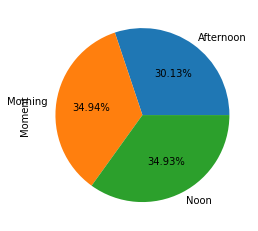

In [6]:
data1.plot.pie(autopct="%.2f%%")

<AxesSubplot:xlabel='Cost Delivery', ylabel='Number of Comments'>

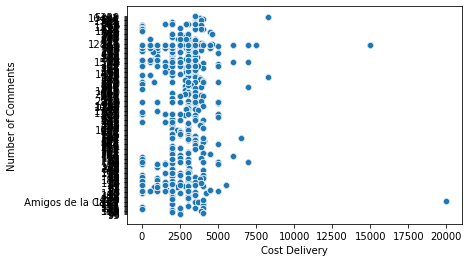

In [7]:
sbn.scatterplot(data=datos, x="Cost Delivery", y="Number of Comments")

Hay algo extraño en este gráfico. Resulta que en el eje Y (todos los registros deben ser numéricos y resulta que aparece un registro de texto "Amigos de la C"... si uno saca un summary, puede darse cuenta de ese error dado que la variable "Number of Comments" es una variable numérica y al pedirse un resumen deberían aparecer los resultados estadísticos.

In [8]:
datos['Number of Comments'].describe()

count     14751
unique      240
top           0
freq       2171
Name: Number of Comments, dtype: object

Compare cómo deberían salir los resultados de una variable numérica.

In [9]:
datos["Cost Delivery"].describe()

count    14271.000000
mean      2614.453928
std       1577.961057
min          0.000000
25%       2000.000000
50%       2800.000000
75%       3500.000000
max      20000.000000
Name: Cost Delivery, dtype: float64

Como quiero hacer un scatterplot con number of comments y cost delivery, voy a crear una segunda base de datos que únicamente contenga estas dos variables. (Por conveniencia, esto lo hice en R con otro pequeño script). El script en R se llama "ExportingFewVariablesForPythonAnalysis.R" y está disponible [en este link](https://github.com/jcorrean/mypythonadventure/blob/main/ExportingFewVariablesForPythonAnalysis.R)

In [10]:
df = pd.read_excel('commentscost.xlsx')
df.describe()

,Number of Comments,Cost Delivery
count,14727.000000,14271.000000
mean,200.618795,2614.453928
std,794.873828,1577.961057
min,0.000000,0.000000
25%,3.000000,2000.000000
50%,26.000000,2800.000000
75%,139.000000,3500.000000
max,12832.000000,20000.000000


<AxesSubplot:xlabel='Cost Delivery', ylabel='Number of Comments'>

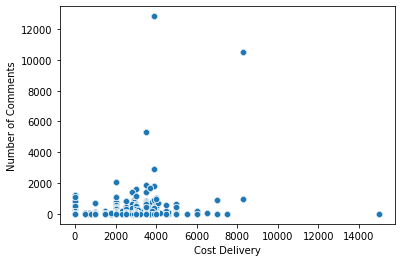

In [11]:
sbn.scatterplot(data=df, x="Cost Delivery", y="Number of Comments")

In [12]:
df['Log(Number of Comments)'] = np.log2(df['Number of Comments'])
df['Log(Cost Delivery)'] = np.log2(df['Cost Delivery'])


/home/jc/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:274: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [13]:
df.head()

,Moment,Number of Comments,Cost Delivery,Log(Number of Comments),Log(Cost Delivery)
0,Morning,5329.0,3500.0,12.379649,11.773139
1,Morning,5329.0,3500.0,12.379649,11.773139
2,Morning,5329.0,3500.0,12.379649,11.773139
3,Morning,5329.0,3500.0,12.379649,11.773139
4,Morning,5329.0,3500.0,12.379649,11.773139


<AxesSubplot:xlabel='Cost Delivery', ylabel='Log(Number of Comments)'>

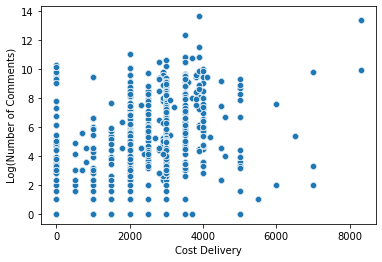

In [14]:
sbn.scatterplot(data=df, x="Cost Delivery", y="Log(Number of Comments)")

<AxesSubplot:xlabel='Log(Cost Delivery)', ylabel='Log(Number of Comments)'>

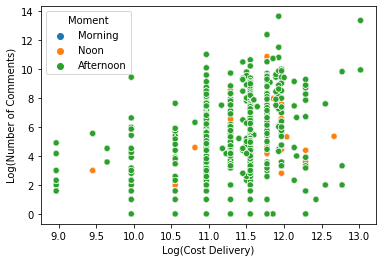

In [15]:
sbn.scatterplot(data=df, x="Log(Cost Delivery)", y="Log(Number of Comments)", hue="Moment")